# Example

This is an example notebook to try out the "ipynb2md", which is a simple, fast and beautiful tool to convert `.ipynb` file to `.md` file.

Example
- Markdown Cells Examples
- Raw NBConvert Cells Examples
- Code Cells Examples
  - No Output
  - Output
    - Stream Output
    - Display Data
    - Execute Result
    - Error
- Other Examples
  - ShowMeMethods
  - ReprMimebundleTest
  - ReprHtmlTest
  - ReprPngTest

## Markdown Cells Examples

Markdown cells are used for body-text, and contain markdown, as defined in [GitHub-flavored markdown](https://help.github.com/articles/github-flavored-markdown), and implemented in [marked](https://github.com/chjj/marked).

How is math handled and displayed?

[Euler's identity](https://simple.wikipedia.org/wiki/Euler%27s_identity), sometimes called Euler's equation, is this equation:
$$e^{i\pi} + 1 = 0$$
It features the following mathematical constants:
- $\pi$, pi: $\pi \approx 3.14159$
- $e$, Euler's Number: $e \approx 2.71828$
- $i$, imaginary unit: $i = \sqrt{-1}$


## Raw NBConvert Cells Examples

A raw cell is defined as content that should be included unmodified in [nbconvert](https://nbconvert.readthedocs.org/) output. For example, this cell could include raw LaTeX for nbconvert to pdf via latex, or restructured text for use in Sphinx documentation.

The notebook authoring environment does not render raw cells.

The only logic in a raw cell is the format metadata field. If defined, it specifies which nbconvert output format is the intended target for the raw cell. When outputting to any other format, the raw cell's contents will be excluded. In the default case when this value is undefined, a raw cell's contents will be included in any nbconvert output, regardless of format.

## Code Cells Examples

A code cell can have a variety of outputs (stream data or rich mime-type output). These correspond to [messages](https://jupyter-client.readthedocs.io/en/stable/messaging.html#messaging) produced as a result of executing the cell.

All outputs have an `output_type` field, which is a string defining what type of output it is.

### No Output

This is a code cell for importing libraries. Obviously, it has no output.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Outputs

There are four main output types: `stream`, `display_data`, `execute_result`, `error`.

#### Stream Output

- stdout
- stderr

In [2]:
# stdout output
print('This is a stdout output.', file=sys.stdout)

# stderr output
print('This is a stderr output.\n\nThis is another stderr output.', file=sys.stderr)

This is a stdout output.


This is a stderr output.

This is another stderr output.


#### Display Data

Rich display outputs, as created by `display_data` messages, contain data keyed by mime-type. This is often called a mime-bundle, and shows up in various locations in the notebook format and message spec. The metadata of these messages may be keyed by mime-type as well.

Draw a beautiful [Koch snowflake](https://en.wikipedia.org/wiki/Koch_snowflake). This is an official example of [Filled polygon](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py) in matplotlib.

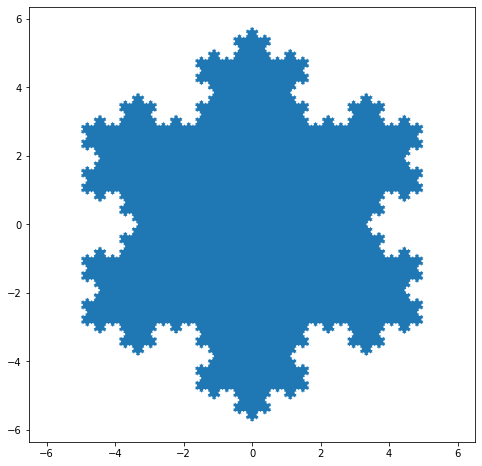

In [3]:
# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """

    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y


x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

#### Execute Result

Results of executing a cell (as created by `displayhook` in Python) are stored in `execute_result` outputs. execute_result outputs are identical to `display_data`, adding only a `execution_count field`, which must be an integer.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]


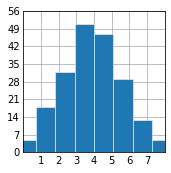

[0. 0. 0. 0. 0. 0. 0.]


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.982660,0.950575,0.153592,0.443929,0.881261,0.184875,0.385677,0.323046,0.822011,0.596101,...,0.342276,0.409496,0.865824,0.750288,0.327311,0.325574,0.675342,0.262318,0.521162,0.888366
1,0.916191,0.195075,0.723849,0.632853,0.748322,0.515854,0.744937,0.120272,0.961874,0.441111,...,0.134500,0.509945,0.362977,0.594119,0.233724,0.580413,0.729554,0.407306,0.103715,0.660374
2,0.214319,0.511553,0.292303,0.777637,0.634623,0.139056,0.253148,0.945791,0.838009,0.982757,...,0.279841,0.647603,0.693227,0.299809,0.055384,0.922965,0.128182,0.374416,0.027185,0.763784
3,0.236895,0.085613,0.528804,0.617442,0.338415,0.951204,0.065066,0.378591,0.150739,0.283930,...,0.760430,0.895369,0.537353,0.950264,0.439080,0.142069,0.258249,0.139753,0.443179,0.633011
4,0.144268,0.804505,0.229383,0.394636,0.752593,0.646893,0.183480,0.919716,0.362999,0.541700,...,0.559708,0.147414,0.930116,0.838914,0.500119,0.567617,0.747650,0.586862,0.927173,0.085880


In [4]:
# Create a random numpy.ndarray whose shape is (5, 50).
np.random.seed(1225)
print(np.zeros(10))
print(np.zeros(7))
plt.style.use('_mpl-gallery')

# make data
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()
# print(pd.DataFrame(np.random.rand(5, 50)))
print(np.zeros(7))
pd.DataFrame(np.random.rand(5, 50))

#### Error

Failed execution may show an error.


In [5]:
# ZeroDivisionError
1 / 0

ZeroDivisionError: division by zero

## Other Examples

### ShowMeMethods

In [6]:
class ShowMeMethods:
    def __getattr__(self, attr):
        print(attr)

ShowMeMethods()

_ipython_canary_method_should_not_exist_
_ipython_display_
_ipython_canary_method_should_not_exist_
_repr_mimebundle_
_ipython_canary_method_should_not_exist_
_repr_html_
_ipython_canary_method_should_not_exist_
_repr_markdown_
_ipython_canary_method_should_not_exist_
_repr_svg_
_ipython_canary_method_should_not_exist_
_repr_png_
_ipython_canary_method_should_not_exist_
_repr_pdf_
_ipython_canary_method_should_not_exist_
_repr_jpeg_
_ipython_canary_method_should_not_exist_
_repr_latex_
_ipython_canary_method_should_not_exist_
_repr_json_
_ipython_canary_method_should_not_exist_
_repr_javascript_


### ReprMimebundleTest

The Jupyter Python kernel now supports a new repr function called `_repr_mimebundle_` which can be used to provide several representations of the same object in a dictionary. Unlike `_repr_[html|json|svg|png...]_` which are only a limited list of supported mimetypes.

In [7]:
class ReprMimebundleTest:
    def _repr_mimebundle_(self, **kwargs):
        return {
            'text/html': '<p>This is a test for <b>_repr_mimebundle_</b></p>',
            'text/plain': '<p>This is a test for <b>_repr_mimebundle_</b></p>'
        }

ReprMimebundleTest()

<p>This is a test for <b>_repr_mimebundle_</b></p>

### ReprHtmlTest

In [8]:
class ReprHtmlTest:
    def _repr_html_(self):
        return '<p><i>ReprHtmlTest</i> is a test for <b>_repr_html_</b></p>'

ReprHtmlTest()

### ReprPngTest

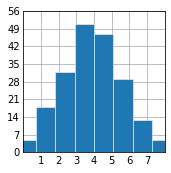

In [9]:
class ReprPngTest:
    def _repr_png_(self):
        return "iVBORw0KGgoAAAANSUhEUgAAAKsAAACtCAYAAADPsY8EAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAMVUlEQVR4nO3df6zddX3H8eert4ViKVyF2jDbCBKVEJyFYmUTXakTUQkYRdMmEJIJOKOLTEXHlshcNFkIUcwyfw0qbGJVQIiyoTShV2aCuBZKKbZ0wuikBWtrbqB3tPW27/3x/V56uPec3nO+38+3PZ97X4/khHO+55w379u877mf8/2+P5+PIgKzHMw40gmYdcvFatlwsVo2XKyWDRerZcPFatnoqlglPS3pMUnrJa1tOf5XkjZLelzS9c2laQYze3jteRGxc+yBpPOAi4E3R8ReSa9Onp1ZizrDgI8B/xgRewEiYkealMza67ZYA7hP0jpJV5XH3gC8XdJDkn4m6S3NpGhW6HYYcG5EbCv/1K+WtLl876uAc4C3AD+Q9LpouX47ODgY8+fPr53kgQMHmDGj/nfBFHH6KZdUcfopF4AtW7bsjIh5E56IiJ5uwN8DnwF+QjGOHTv+JDCv9bWLFy+OFNasWdM3cfopl1Rx+imXiAhgbbSpvUl/DSTNkTR37D5wPrARuBs4rzz+BuAoYGeHMGa1dTMMmA/cJWns9d+NiJ9IOgpYKWkjsA+4vPytMGvEpMUaEU8Bb25zfB9waRNJmbXjK1iWDRerZcPFatlwsVo2XKyWDRerZcPFatlwsVo2eulnnfa27hrhxbkLefDJXbVjzT5hQYKMppeui1XSALAW2BYRF0paBtxA0ROwDvhIRIw2k2Z/2D68h4/dvjlJrK9/6LQkcaaTXoYBnwQ2AUiaAdwKLI+IM4CtwOXp0zM7qNs5WAuA9wE3lYdOAPZFxJby8Wrgg+nTMzuo20/WG4HPAgfKxzuBmZLOLh9fAixMm5rZy006ZpV0IbAjItZJWgoQESFpOfAVSUcD9wH7x793ZGSEoaGh2knu3r27L+K8ODfd7+P+/fv74mdKFSNlnE66+YL1NuAiSe8FZgPHSfpORFwKvB1A0vkUc7JeZs6cOSxdurR2kkNDQ30RJ8VZgDEDAwN98TOlipEyTieTDgMi4tqIWBARJwPLgfsj4tKxqdflJ+vngG80lqUZ9S4KXCNpE7AB+HFE3J8oJ7O2erooEBFDwFB5/xrgmvQpmbXnK1hHyHHHviLJGPjFuQvZumuE154wJ0FW/c3FeoQM79nPx1f9IkmsVVcOTotidSOLZcPFatlwsVo2XKyWDRerZcPFatnoulglDUh6RNI95ePbJD0haaOklZJmNZemWcXm69JtwGnAm4BjgCsS5mU2QdXmayLiP1rW0/wl4ElF1qiqzdcvKf/8X0axuLBZYyo1X4/zNeCBiPjP8U+4+bqzlEvZDg8PMzT0WOX398u/72RqNV9Lug6YB3y03RvdfN1ZuThzEoODg/zJ4lMrv79f/n0nU6f5+grg3cCKiJgwPDBLrc551m9QLOH+YLnz4OcT5WTWVp3ma7cX2mHlK1iWDRerZcPFatlwsVo2XKyWDRerZcPFatlwsVo2XKyWjW62cJ8t6ZeSHpX0uKQvlMdvkfQ/5aXW9ZIWNZ6tTWvdXDLdCyyLiN1l7+rPJd1bPndNRNzRXHpmB3WzhXsAu8uHs8pbumZMsy51O61lQNJ6YAewOiIeKp/6kqQNksZWwDZrTFedUxGxH1gkaRC4S9IZwLXAcxRbC32LYkHhf2h9n2cKdOaZAr3rtUVwWNIa4IKIuKE8vFfSt4HPjH+9Zwp05pkCvevmbMC88hMVSccA7wI2SzqpPCbg/cDGxrI0o7tP1pOAW8sdBmcAP4iIeyTdL2keIGA98JfNpWnW3dmADcCZbY4vayQjsw58Bcuy4WK1bLhYLRtTeobq1l0jbB/e89LjF+curHX6ae/ohB0/7TCa0sW6fXgPK/4lzY4oAN+8bHGyWNY7DwMsGy5Wy4aL1bLhYrVsdNMbsFDSGkm/KmcKfLI8vkjSL8pZAmslLWk+XZvOujkbMAp8OiIeljQXWCdpNXA98IWIuLdcu/V6YGlzqVonM2fU6wgbf0rvjwZn9+VesN30BjwLPFvef0HSJuA1FLMFjitfdjywvakk7dB+/39/4KP/ti5ZvFVXnpNnsbaSdDJFU8tDwNXATyXdQDGc+NPUyZm16rpYJR0L3AlcHRHPS/oi8NcRcaekDwM3A3/e+p4jPVMgZWc/wOjoaLJYKWcKpMwLqs886IuZAuWs1juB2yLih+Xhyyn2xgK4nZZth8Yc6ZkCKTv7AWbOTHfBL+VMgZR5QfWZB/0wU0AUn5qbIuLLLU9tB/6svL8M+O/06Zkd1O1uLZcBj5UzXAH+FrgS+KqkmcAe4KpGMjQrdXM24OcUU1facWeHHTa+gmXZcLFaNlyslg0Xq2XDxWrZcLFaNlyslg0Xq2WjTvP1h8rHBySd3XyqNt3Vab7eCHwA+GaTCZqNqdx8HRGrIW33kNmh9DRmHdd8bXZYVW6+7uY9br7uzM3XvavTfD0pN1935ubr3tVpvjY7rOo0Xx8N/BMwD/h3Sesj4t2NZGlG/ebru9KmY9aZr2BZNlyslg0Xq2Wj71a+Hr+0OlRfXt3Lqk8tfVesKZdW97LqU4uHAZYNF6tlw8Vq2XCxWja66Q1YKWmHpAlbtEv6tKSQdGIz6Zkd1M0n6y3ABeMPSloInA/8b+KczNqatFgj4gHg922e+grwWYrl2s0aV2nMKuliYFtEPJo4H7OOer4oIOkVFC2C50/22iozBVJ296fuoPdMgUPri5kC45wKnAI8Wna7LwAelrQkIp5rfWGVmQIpu/tTd9B7psChNT1ToOefMiIeA1499ljS08DZEbEzYV5mE0xarJJWUWzGdqKkZ4DrIuLmphOzI6fqJnDtGo5SbgDXzUyBFZM8f3KSTKxvpNwELuUGcL6CZdlwsVo2XKyWDRerZcPFatlwsVo2XKyWDRerZcPFatmoXKyS3ihpfcvteUlXJ8zN7GUqt+tExBPAIgBJA8A2vFCbNSjVMOCdwJMRsTVRPLMJUhXrcmBVolhmbdXu2pV0FHARcO345zxToLN+nimQMl7VWQftpGgxfw/wcET8dvwTninQWT/PFEgZr+qsg3ZSDANW4CGAHQa1ilXSHOBdQNc7uJhVVevzPiJGgBMS5WJ2SI2uzzqyd7TnMagXAJ5aqs7nahsrSZQOnto50vPCwF4AeGpJOZ/LvQGWDRerZcPFatlwsVo2XKyWDRerZaPuFawLJD0h6deS/iZVUmbt1JkpMAD8M0Ujy+nACkmnp0rMbLw6n6xLgF9HxFMRsQ/4HnBxmrTMJqpTrK8BftPy+JnymFkjVLUJWNIlwAURcUX5+DLgrRHxiZbX/A7wVBfr1WsjYt74g3V6A7YBrW39C8pjL2n3PzSrqs4w4L+A10s6pZzashz4UZq0zCaqMxV7VNIngJ8CA8DKiHg8WWZm41Qesx4OklYCFwI7IuKMijEWAv8KzKfYYO5bEfHVCnFmAw8AR1P8kt8REddVzGkAWEuxl9iFFWM8DbwA7AdGI+LsinEGgZuAMyj+ff4iIh7sMcYbge+3HHod8PmIuLFKTh1FRN/egHcAZwEba8Q4CTirvD8X2AKcXiGOgGPL+7OAh4BzKub0KeC7wD01fq6ngRMT/BvfClxR3j8KGKwZbwB4juJLUtJ66OvLrdF5K85eYjwbEQ+X918ANlHhFFsUdpcPZ5W3nv8sSVoAvI/i0+yIknQ8xQfCzQARsS8ihmuGbWzBk74u1tQknQycSfGpWOX9A5LWAzuA1RFRJc6NFHveHqiSQ4sA7pO0TtJVFWOcAvwO+LakRyTdVE4CraOxBU+mTbFKOha4E7g6Ip6vEiMi9kfEIorTdEsk9TSOljQ2/k4xz+PciDiL4nL3xyW9o0KMmRTDrK9HxJnACFC5x6NlwZPbq8Y4lGlRrJJmURTqbRFRe9p4+adyDW22tp/E24CLyi9H3wOWSfpOxRy2lf/dQbEg3pIKYZ4Bnmn5C3EHRfFW1XHBkxSmfLGqWPrkZmBTRHy5Rpx55TdnJB1DsV7C5l5iRMS1EbEgio3ulgP3R8SlFXKZI2nu2H2KTZ839honir12f1N+m4divPmrXuO0aHbBk9Tf2FLeyh/8WeAPFJ8CH6kQ41yK8d0GYH15e2+FOH8MPFLG2UhxaqbOz7aUimcDKE4NPVreHgf+rkYeiyhOo20A7gZeWTHOHGAXcHxT9dDX51nNWk35YYBNHS5Wy4aL1bLhYrVsuFgtGy5Wy4aL1bLhYrVs/D9RSnHTdrkUtAAAAABJRU5ErkJggg=="

ReprPngTest()